In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [2]:
pm=pd.read_csv('Poems.csv')
pm.head()

,title,poem,writter,label
0,সেই ছেলে হবে কবে,আমাদের দেশে সেই ছেলে হবে কবে যারা কোথায় না বড় ...,মুহম্মদ জাফর ইকবাল,Policy
1,সন্ত্রাসীদের প্রথম পাঠ,অ অজ্ঞান পার্টি অজ্ঞান পার্টি আসছে ঐ আ আগুন আগ...,মুহম্মদ জাফর ইকবাল,Policy
2,পারো তো ধর্ষণ করো,"আর ধর্ষিতা হয়ো না, আর না আর যেন কোনও দুঃসংবাদ ...",তসলিমা নাসরিন,Policy
3,ফেস অফ,মেয়েটি আসছে মুখটি পোড়া মুখটি এখন আর মুখের মত দ...,তসলিমা নাসরিন,Policy
4,মন উঠো,"মন তুমি ওঠো, ওঠো তুমি, তুমি ওঠো মন, মন মন মন ও...",তসলিমা নাসরিন,Policy


In [3]:
pm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2207 entries, 0 to 2206
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    2207 non-null   object
 1   poem     2207 non-null   object
 2   writter  2207 non-null   object
 3   label    2207 non-null   object
dtypes: object(4)
memory usage: 69.1+ KB


In [4]:
pm.describe()

,title,poem,writter,label
count,2207,2207,2207,2207
unique,1918,2020,53,11
top,তুমি,বল বীর - বল উন্নত মম শির! শির নেহারি’ আমারি নত...,রবীন্দ্রনাথ ঠাকুর,Miscellaneous
freq,5,4,250,811


In [5]:
pm.label.unique()

array(['Policy', 'Religious', 'War', 'Humanity', 'Nature',
       'Miscellaneous', 'Love', 'Metaphor', 'Separation', 'Children',
       'Patriotic'], dtype=object)

In [6]:
pm_name=['Policy', 'Religious', 'War', 'Humanity', 'Nature', 'Separation', 'Children', 'Patriotic', 'Metaphor']

def drop_column(ex):
  omg=pm[(pm['label'] == ex)].index
  pm.drop(omg, inplace=True)

for x in range(len(pm_name)):
  drop_column(pm_name[x])

In [7]:
pm.label.unique()

array(['Miscellaneous', 'Love'], dtype=object)

In [8]:
pm.describe()

,title,poem,writter,label
count,1311,1311,1311,1311
unique,1275,1307,36,2
top,তুমি,"তোমাকে বিশ্বাস করেছিলাম, যা কিছু নিজের ছিল দিয...",মহাদেব সাহা,Miscellaneous
freq,5,2,170,811


In [9]:
pm.head()

,title,poem,writter,label
295,না,কিছুতেই রাজি নয় বল বাবাজি নারাজি নারাজি নারাজ...,মুহম্মদ জাফর ইকবাল,Miscellaneous
296,তুই কোথায় শেফালি,আমার খুব দেখতে ইচ্ছে করছে তুই কোথায় আমার খুব ...,তসলিমা নাসরিন,Miscellaneous
297,না-থাকা,একটি ভীষণ না-থাকাকে সঙ্গে নিয়ে আমি প্রতি রাত্...,তসলিমা নাসরিন,Miscellaneous
298,কলকাতা তুই তোর হৃদয়,"সবখানেই পুঁজিবাদের হাতি হাঁটছে, সবখানেই সাম্রা...",তসলিমা নাসরিন,Miscellaneous
299,শেষ পর্যন্ত,"না, কলকাতা শেষপর্যন্ত তুমিও আমার কোনও সমাধান ন...",তসলিমা নাসরিন,Miscellaneous


In [10]:
import re
whitespace = re.compile(u"[\s\u0020\u00a0\u1680\u180e\u202f\u205f\u3000\u2000-\u200a]+", re.UNICODE)
bangla_fullstop = u"\u0964"
punctSeq   = u"['\"“”‘’]+|[.?!,…]+|[:;]+"
punc = u"[(),$%^&*+={}\[\]:\"|\'\~`<>/—,¦!?;-]+"


for i in range(len(pm)):
  txt=pm.poem.values[i]

  txt = whitespace.sub(" ",txt).strip()
  txt = re.sub(punctSeq, " ", txt)
  txt = re.sub(bangla_fullstop, "",txt)
  txt = re.sub(punc, " ", txt)

  pm.poem.values[i]=txt

In [11]:
le=LabelEncoder()

pm['label']=le.fit_transform(pm['label'])

In [12]:
pm.label.unique()

array([1, 0])

In [13]:
pm1=pm.sample(frac=1, random_state=42)

pm1.head()

,title,poem,writter,label
1415,নকশী কাঁথার মাঠ – ১২,বার রাইত তুই যা রে পোহাইয়ে বেলা গে ল সন্ধ্যা...,জসীম উদ্‌দীন,0
1367,ভিতর-বাইরে বিষম যুদ্ধ,ইচ্ছে ছিলো তোমার কাছে ঘুরতে ঘুরতে যাবোই আমার প...,শক্তি চট্টোপাধ্যায়,0
493,মাঠের সন্ধ্যা,অন্যমনে যেতে যেতে হঠাৎ যদি মাঠের মধ্যে দাঁড়াই...,নীরেন্দ্রনাথ চক্রবর্তী,1
870,সোনার তরী,গগনে গরজে মেঘ ঘন বরষা কূলে একা বসে আছি নাহি ...,রবীন্দ্রনাথ ঠাকুর,1
626,শস্যযাত্রা,তোমাকে ধরবে না এই কালো পাটকেলে কামিজে খুলে এই ...,মহাদেব সাহা,1


In [14]:
pm1.label.unique()

array([0, 1])

In [15]:
NUM_WORDS=40000
MAX_SEQUENCE_LENGTH=200

In [16]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [17]:
tokenizer=Tokenizer(num_words=NUM_WORDS,lower=False,)
tokenizer.fit_on_texts(pm1.poem.values)
word_index=tokenizer.word_index

print(word_index)
print('Unique Tokens : %s'%len(word_index))

{'না': 1, 'আমি': 2, 'আমার': 3, 'এই': 4, 'তুমি': 5, 'যে': 6, 'তোমার': 7, 'তার': 8, 'আর': 9, 'সে': 10, 'করে': 11, 'মতো': 12, 'কি': 13, 'সেই': 14, 'যেন': 15, 'এ': 16, 'থেকে': 17, 'আছে': 18, 'মনে': 19, 'ও': 20, 'যায়': 21, 'এক': 22, 'সব': 23, 'কথা': 24, 'আজ': 25, 'হয়ে': 26, 'নেই': 27, 'হবে': 28, 'শুধু': 29, 'তো': 30, 'যদি': 31, 'কাছে': 32, 'হয়': 33, 'রে': 34, 'কিছু': 35, 'কোনো': 36, 'তাই': 37, 'তবু': 38, 'কেউ': 39, 'কী': 40, 'কত': 41, 'নাই': 42, 'বলে': 43, 'এখন': 44, 'গেছে': 45, 'কে': 46, 'আসে': 47, 'করি': 48, 'মোর': 49, 'দিয়ে': 50, 'কেন': 51, 'পড়ে': 52, 'মুখ': 53, 'হতে': 54, 'জল': 55, 'ছিল': 56, 'বুকে': 57, 'দিকে': 58, 'হাত': 59, 'চলে': 60, 'একটি': 61, 'হাতে': 62, 'ফুল': 63, 'জানি': 64, 'এসে': 65, 'তারা': 66, 'ফিরে': 67, 'চোখ': 68, 'আমাকে': 69, 'জীবন': 70, 'পরে': 71, 'মধ্যে': 72, '–': 73, 'আমাদের': 74, 'আকাশ': 75, 'দেখে': 76, 'নিয়ে': 77, 'ওঠে': 78, 'দেখি': 79, 'আবার': 80, 'গান': 81, 'মানুষ': 82, 'ঘরে': 83, 'তাহার': 84, 'আলো': 85, 'অনেক': 86, 'গেল': 87, 'মতন': 88, 'হে': 89, 'যেতে': 90

In [18]:
sequences=tokenizer.texts_to_sequences(pm1.poem.values)

X=pad_sequences(sequences,maxlen=MAX_SEQUENCE_LENGTH,padding='post')

print('Shape of data tensor:',X.shape)
#print(X[0])

Shape of data tensor: (1311, 200)


In [19]:
Y=pd.get_dummies(pm1.label).values

print('Shape of label tensor:',Y.shape)

Shape of label tensor: (1311, 2)


In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=None)

print('Train Set Size:', X_train.shape, Y_train.shape)
print('Test Set size:', X_test.shape, Y_test.shape)

Train Set Size: (1048, 200) (1048, 2)
Test Set size: (263, 200) (263, 2)


In [22]:
print(X.shape[1])

200


In [23]:
print(Y.shape[1])

2


In [24]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_12 (Embedding)     (None, 200, 64)           2560000   
_________________________________________________________________
conv1d_12 (Conv1D)           (None, 200, 32)           10272     
_________________________________________________________________
max_pooling1d_12 (MaxPooling (None, 100, 32)           0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 3200)              0         
_________________________________________________________________
dense_24 (Dense)             (None, 32)                102432    
_________________________________________________________________
dense_25 (Dense)             (None, 2)                 66        
Total params: 2,672,770
Trainable params: 2,672,770
Non-trainable params: 0
___________________________________________

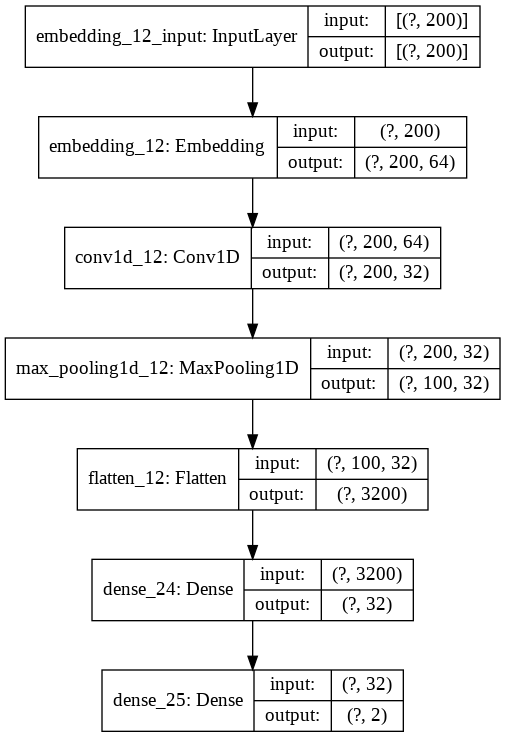

In [66]:
EMBEDDING_DIM=64

model=Sequential()
model.add(Embedding(NUM_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(Conv1D(32, 5, padding='same', activation='relu'))
model.add(MaxPooling1D())
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(Y.shape[1], activation='softmax'))

model.compile(optimizer='Adam', loss='binary_crossentropy',metrics=['acc'])

model.summary()

tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True, rankdir='TB', expand_nested=False, dpi=96)

In [67]:
epochs=10
batch_size=32

In [68]:
history=model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,  validation_split=0.2) 

Epoch 1/10
27/27 [==============================] - 1s 53ms/step - loss: 0.6535 - acc: 0.6277 - val_loss: 0.6442 - val_acc: 0.6524
Epoch 2/10
27/27 [==============================] - 1s 48ms/step - loss: 0.5023 - acc: 0.6718 - val_loss: 0.6039 - val_acc: 0.6714
Epoch 3/10
27/27 [==============================] - 1s 49ms/step - loss: 0.1949 - acc: 0.9809 - val_loss: 0.5037 - val_acc: 0.7667
Epoch 4/10
27/27 [==============================] - 1s 50ms/step - loss: 0.0333 - acc: 0.9940 - val_loss: 0.5648 - val_acc: 0.7476
Epoch 5/10
27/27 [==============================] - 1s 49ms/step - loss: 0.0103 - acc: 0.9976 - val_loss: 0.5638 - val_acc: 0.7524
Epoch 6/10
27/27 [==============================] - 1s 50ms/step - loss: 0.0043 - acc: 1.0000 - val_loss: 0.4886 - val_acc: 0.7810
Epoch 7/10
27/27 [==============================] - 1s 52ms/step - loss: 0.0023 - acc: 1.0000 - val_loss: 0.5226 - val_acc: 0.7762
Epoch 8/10
27/27 [==============================] - 1s 50ms/step - loss: 0.0011 - a

In [69]:
acr=model.evaluate(X_test, Y_test)

print('Test set\n Loss: {:0.3f}\n Accuracy: {:0.3f}'.format(acr[0], acr[1]*100))

9/9 [==============================] - 0s 5ms/step - loss: 0.4755 - acc: 0.8023
Test set
 Loss: 0.475
 Accuracy: 80.228


In [70]:
import matplotlib.pyplot as plt

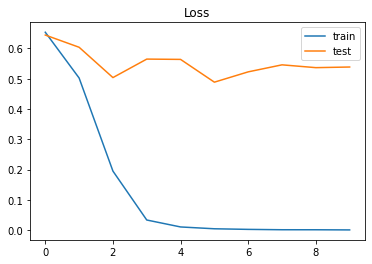

In [71]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

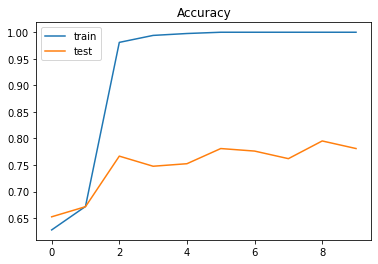

In [72]:
plt.title('Accuracy')
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='test')
plt.legend()
plt.show();

In [73]:
predicted_classes = model.predict(X_test)
#print(predicted_classes)

In [74]:
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
#print(predicted_classes)

In [75]:
#print(Y_test)

In [76]:
test_Y=[]
for i in range (263):
    for j in range (2):
        if(Y_test[i][j]==1):
            test_Y.append(j)

print(len(test_Y))

263


In [77]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(2)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.90      0.64      0.75       121
     Class 1       0.76      0.94      0.84       142

    accuracy                           0.80       263
   macro avg       0.83      0.79      0.79       263
weighted avg       0.82      0.80      0.80       263



In [78]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

Confusion matrix, without normalization
[[ 78  43]
 [  9 133]]
Normalized confusion matrix
[[0.64 0.36]
 [0.06 0.94]]


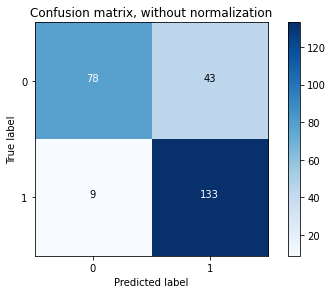

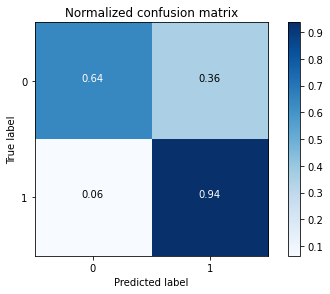

In [79]:
class_names = ['0','1']

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(test_Y, predicted_classes)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()